In [139]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import os

In [140]:
fashion_minist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_minist.load_data()

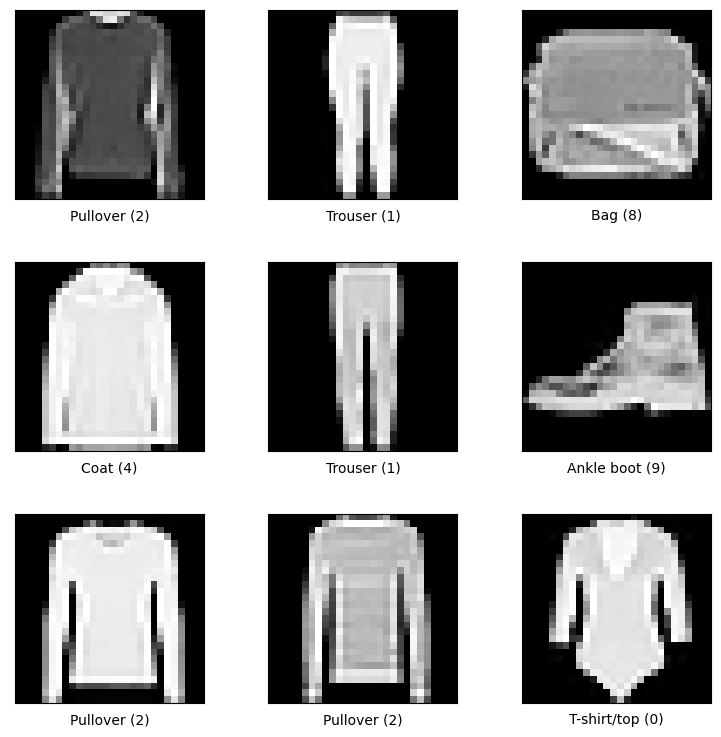

In [141]:
ds, ds_info = tfds.load('fashion_mnist', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [142]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [143]:
train_images = np.reshape(train_images.astype('float32') / 255, (train_images.shape[0], 28, 28, 1))
test_images = np.reshape(test_images.astype('float32') / 255, (test_images.shape[0], 28, 28, 1))

In [144]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

In [145]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),  
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'), 
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

In [146]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)        

In [147]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [148]:
checkpoint_dir = './fashion_mnist_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [149]:
print(train_images.shape)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

(60000, 28, 28, 1)
Epoch 1/10
1500/1500 [==============================] - 30s 19ms/step - loss: 0.5396 - accuracy: 0.7988 - val_loss: 0.3675 - val_accuracy: 0.8693
Epoch 2/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3587 - accuracy: 0.8678 - val_loss: 0.3256 - val_accuracy: 0.8832
Epoch 3/10
1500/1500 [==============================] - 23s 16ms/step - loss: 0.3131 - accuracy: 0.8849 - val_loss: 0.2929 - val_accuracy: 0.8910
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2855 - accuracy: 0.8947 - val_loss: 0.2671 - val_accuracy: 0.9025
Epoch 5/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2673 - accuracy: 0.9013 - val_loss: 0.2580 - val_accuracy: 0.9005
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2546 - accuracy: 0.9044 - val_loss: 0.2528 - val_accuracy: 0.9071
Epoch 7/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2438 - accuracy: 0.9091 -

In [150]:
testLoss, testAccuracy = model.evaluate(test_images, test_labels, verbose=1)
print("Accuracy: ", testAccuracy)
print("Loss: ", testLoss)

313/313 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.9045
Accuracy:  0.9045000076293945
Loss:  0.2669605612754822


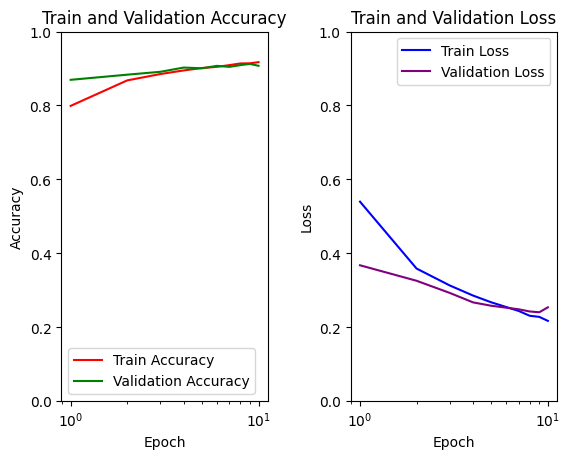

In [151]:
hist = history.history
epoch = range(1, 11)
train_loss = hist['loss']
train_acc = hist['accuracy']
val_loss = hist['val_loss']
val_acc = hist['val_accuracy']

fig, axes = plt.subplots(1, 2)
axes[0].semilogx(epoch, train_acc, color='red', label="Train Accuracy")
axes[0].semilogx(epoch, val_acc, color='green', label="Validation Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Train and Validation Accuracy")
axes[0].set_ylim([0, 1])

axes[1].semilogx(epoch, train_loss, color="blue", label="Train Loss")
axes[1].semilogx(epoch, val_loss, color='purple', label='Validation Loss')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Train and Validation Loss")
axes[1].set_ylim([0, 1])

fig.subplots_adjust(wspace=0.4)
axes[0].legend(fontsize=10)
axes[1].legend(fontsize=10)


1/1 [==============================] - 0s 375ms/step


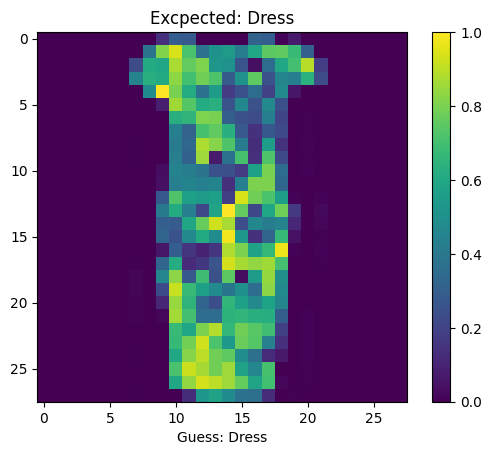

In [152]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.show()

num = 100
image = test_images[num]
label = test_labels[num]
predict(model, image, label)